[17840, 17682, 17243, 17400, 17500, 17405, 17305, 17522, 17986, 17740, 17652, 17236, 17455, 17313, 17391, 17459, 17451, 17999, 17858, 17575, 17571, 17220, 17288, 17463, 17310, 17518, 17985, 17754, 17461, 17408, 17318, 17379, 17243, 17246, 17570, 17963]


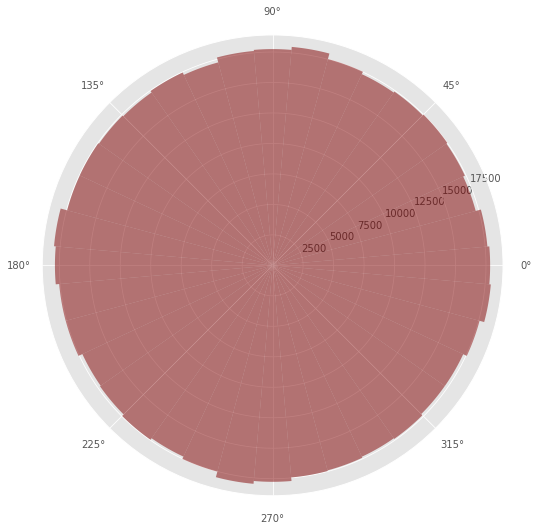

In [10]:
## Plot orientation of lattices

# Install pandas
# !pip install pandas
# Import Pandas Data frame and read_csv
from pandas import DataFrame, read_csv
import pandas as pd 
import math
import numpy as np

# Import Matplotlib
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc
import matplotlib
matplotlib.style.use('ggplot')

# Load data of elements - step #0
elements = r'./elements.csv'
df = pd.read_csv(elements,delimiter=',')
# Get orientation direction x-y
df['anglexyrad'] = df['anglexy'].apply(lambda x: x*180/math.pi)

# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# Number of sections
angle = 10
nsection = int(360 / angle)
direction = np.linspace(0, 360, nsection, False) / 180 * np.pi
frequency = [0] * (nsection)
for i in range(len(df.anglexyrad)):
	tmp = int((df.anglexyrad[i] - df.anglexyrad[i] % angle) / angle)
	frequency[tmp] = frequency[tmp] + 1
width = angle / 180.0 * np.pi * np.ones(nsection)
bars = ax.bar(direction, frequency, width=width, bottom=0.0)
print(frequency)
for r,bar in zip(frequency, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

show()